In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [25]:
I=load("Simulation1/InitialConfigurations.npy")
F=load("Simulation1/FinalConfigurations.npy")
grid=np.load("Simulation1/grid.npy")

In [26]:
I.shape

(10, 10, 1, 2500)

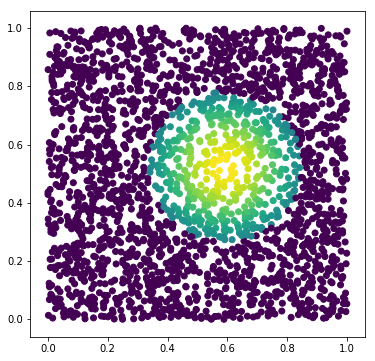

In [28]:
figure(figsize=(6,6))
scatter(grid.T[0],grid.T[1],c=I[5][5][0])